In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import os
import seaborn as sb
import tweepy
%matplotlib inline

## 1. Gather the data

We are going to gather the data from the 'twitter-archive-enhanced' (.csv), 'image_predictions' (.tsv) and the 'twit_json_copy' (json). After this we are going to create a dataframe with each of them.

In [632]:
df_enhanced=pd.read_csv('twitter-archive-enhanced.csv')
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [633]:
df_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [634]:
http = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

download = requests.get(http)
with open('image_predictions.tsv',mode='wb') as file:
    file.write(download.content)

In [635]:
df_img_pred= pd.read_csv('image_predictions.tsv', sep='\t')
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [636]:
df_img_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


consumer_key = 'PTjWGxl5TqRRoYYgI2fqE####'# API key
consumer_secret = 'zCp1gap2nUkRPYGlgTOedrKMeYwc3a805m6O7NGDRkmZlJ####' # API secret key
access_token = '1374715753518276610-1L5s00vLTglvC4djeExxXGDtWn####'
access_secret = 'T2JcWu6B65ofCRXuK5gPKyzyazl3yvfh5JIN32Yrh####'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df_enhanced.tweet_id.values

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json_copy.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


### !WARNING! ### The last three cells above show how it would be the code to pull tweet from the twitter API. However it is writen in markdown and withouth the right *cosnumer_key, consumer_secret, access_token and access_secret*.

In [637]:
with open('tweet_json_copy') as file1:
    twitter = pd.DataFrame((json.loads(line) for line in file1))

twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [638]:
twitter.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN


In [639]:
df_twitter_api = twitter.iloc[:,np.r_[1,8,20,21]]
df_twitter_api.head(2)

,id,source,retweet_count,favorite_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819


In [640]:
df_twitter_api.rename(columns={'id':'tweet_id'}, inplace=True)
df_twitter_api.head(2)

C:\Users\Xabi\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,tweet_id,source,retweet_count,favorite_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819


## 2. Assessing data

The **df_enhanced** has the following problems:


1. *tweet_id* column should be an object instead of a number in this dataframe and in all the rest too. We don´t want to make mathematical work with this information, so we will treat it as would treat a post code (object type). Quality issue Nr.1.
2. The *timestamp* column is an 'object' instead of being a 'datetime' data type column. Quality issue Nr.2.
3. Create a unique colum for dog categories (doggo, floofer, pupper, puppo) called *category*. Tidiness issue Nr.1.
4. Delete excess columns.Quality issue Nr.3.
5. Validity of rating denominator. Quality issue Nr.4.

In [641]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [642]:
df_enhanced.describe() # In the table below we can see the inconsistencies related to 'rating_numerator' and 
#'rating_denominator' columns ( points 4, 5 and 6 of the problem list for 'df_enhanced' described previously).

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [643]:
df_enhanced.info() # with the information below, we notice that the 'tweet_id' is an integer (instead of an object) and the
# timestamp is an object (instead of a datetime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

We have also realized that there are 'tweet_id' that have more than one dog category (pupper, puppo, floofer, doggo). This will be more deeply checked in the *cleaning* section.

Regarding the **df_img_pred**, the following issues were found:


6. There are many 'tweet_id' that do not have any images in df_img_pred1 dataframe, less than the 2356 'tweet_id' from the df_enhanced dataframe. Quality issue Nr.5.
7. Non-consistent writing in the *p1*, *p2*, *p3* columns. Quality issue Nr.6.
8. More descriptive column names. Quality issue Nr.7.
9. Duplicates in *jpg_url* column. Quality issue Nr.8.
10. Select the rows with non-null values and drop them. Quality issue Nr.9.
11. Select the columns we do not need and drop them (also in *df_twitter_api1). Quality issue Nr.10.

In [734]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [735]:
df_img_pred.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False
1852,840632337062862849,https://pbs.twimg.com/media/C6qGphPV4AEKrdc.jpg,1,golden_retriever,0.711148,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True
681,683828599284170753,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute,0.577376,True,Siberian_husky,0.287131,True,Eskimo_dog,0.117563,True
246,670474236058800128,https://pbs.twimg.com/media/CU4AwqQWUAAEgE2.jpg,1,wool,0.070076,False,siamang,0.062536,False,gorilla,0.058894,False
1213,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True
850,695767669421768709,https://pbs.twimg.com/media/CafdAWCW0AE3Igl.jpg,1,soft-coated_wheaten_terrier,0.805139,True,Lakeland_terrier,0.121662,True,Afghan_hound,0.023303,True
1048,713411074226274305,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1,Great_Pyrenees,0.720337,True,Samoyed,0.129542,True,kuvasz,0.122451,True
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
117,668142349051129856,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,0.011015,False
855,696713835009417216,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg,1,car_mirror,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True


In [736]:
sum(df_img_pred['jpg_url'].duplicated()) ### 66 rows with duplicated values

66

In [737]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   source          2354 non-null   object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


##### Final merge
12. Merge the three dataframes because they belong to the same observational unit. Tidiness issue Nr.2.

## 3. Cleaning data

We make a copy of the data files in order to start to clean them

In [648]:
df_enhanced1= df_enhanced.copy()
df_twitter_api1= df_twitter_api.copy()
df_img_pred1=df_img_pred.copy()

###### 1. Convert *tweet_id* into an object in all dataframes
##### Quality issue Nr.1

###### Define
We need to convert *tweet_id* into an object type data in all our dataframes

###### Clean
We convert *tweet_id* column into object in all the dataframes

In [649]:
df_enhanced1['tweet_id']=df_enhanced1['tweet_id'].astype(str)
df_enhanced1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [650]:
df_img_pred1['tweet_id']=df_img_pred1['tweet_id'].astype(str)
df_img_pred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [651]:
df_twitter_api1['tweet_id']=df_twitter_api1['tweet_id'].astype(str)
df_twitter_api1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   source          2354 non-null   object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


##### Test
In the previous three last cells we have converted the *tweet_id* column data type from integer to string. As we do not need to make mathematical calculations, it will be more confortable to work with the *tweet_id* as objet/string data. We have tested of all the changes using *.info()* function.

#### 2. Convert *timestamp* column into a datetime type data
##### Quality issue Nr.2

##### Define
We need to convert *timestamp* into *datetime* data type.

##### Clean
We proceed to convert *timestamp* into a *datetime*.

In [652]:
df_enhanced1['timestamp']=pd.to_datetime(df_enhanced1['timestamp'],yearfirst=True,infer_datetime_format=True)

##### Test
We test the data type of the *timestamp* column.

In [653]:
df_enhanced1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

Now we have converted the *timestamp* column into a **datetime64** data type.

#### 3. We are going to create an only column for the dog categories, called *category*

#### Tidiness issue Nr.1
##### Define
Below we are going to create a column to have an only column to gather the columns regarding the dog category.

In [654]:
df_enhanced1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [655]:
df_enhanced1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [656]:
df_enhanced1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [657]:
df_enhanced1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

We are going to create a column called **cat_count** in which we are going to count the number of categories that has each dog for every *tweet_id*.

In [658]:
def count_category (row):
    count=0
    if row['pupper'] == 'pupper':
        count+=1
    if row['floofer'] =='floofer':
        count+=1
    if row['doggo'] == 'doggo':
        count+=1
    if row['puppo'] == 'puppo':
        count+=1
        return count
    else:
        return count

df_enhanced1['cat_count']= df_enhanced1.apply(lambda row: count_category(row), axis=1)
df_enhanced1.cat_count.value_counts()

0    1976
1     366
2      14
Name: cat_count, dtype: int64

As we can see above, 14 dogs have two have two categories.

##### Clean
Below we are going to create the *category* column

We are going to create a column called **category** with the information of the *doggo*, *floofer*, *pupper* and *puppo* columns, so we have a column with the category of each dog, instead of four columns. For the cases in which there are two categories, we are going to include both of them in the **category** column as if it was another category.

In [659]:
def category (row):
        
    if row['pupper'] == 'pupper' and row['floofer'] =='floofer':
        return 'pupper and floofer'
    if row['pupper'] == 'pupper' and row['doggo'] =='doggo':
        return 'pupper and doggo'
    if row['pupper'] == 'pupper' and row['puppo'] =='puppo':
        return 'pupper and puppo'
    if row['floofer'] == 'floofer' and row['doggo'] =='doggo':
        return 'floofer and doggo'
    if row['floofer'] == 'floofer' and row['puppo'] =='puppo':
        return 'floofer and puppo'
    if row['doggo'] == 'doggo' and row['puppo'] =='puppo':
        return 'doggo and puppo'
    if row['pupper'] == 'pupper' :
        return 'pupper'
    if row['floofer'] =='floofer' :
        return 'floofer'
    if row['doggo'] == 'doggo' :
        return 'doggo'
    if row['puppo'] == 'puppo':
         return 'puppo'
    
    else:
        return 'None'
    
df_enhanced1['category']=df_enhanced1.apply(lambda row: category(row), axis=1) 

##### Test
We are going to test if we have created the *category* columns and also the values of each category

In [660]:
df_enhanced1.category.value_counts()

None                 1976
pupper                245
doggo                  83
puppo                  29
pupper and doggo       12
floofer                 9
floofer and doggo       1
doggo and puppo         1
Name: category, dtype: int64

Now we have a new column with the category for every dog, even though some of them have two categories.

In [661]:
df_text_2cat=df_enhanced1[df_enhanced1['cat_count']==2].text
df_text_2cat

191     Here's a puppo participating in the #ScienceMa...
200     At first I thought this was a shy doggo, but i...
460     This is Dido. She's playing the lead role in "...
531     Here we have Burke (pupper) and Dexter (doggo)...
565     Like doggo, like pupper version 2. Both 11/10 ...
575     This is Bones. He's being haunted by another d...
705     This is Pinot. He's a sophisticated doggo. You...
733     Pupper butt 1, Doggo 0. Both 12/10 https://t.c...
778     RT @dog_rates: Like father (doggo), like son (...
822     RT @dog_rates: This is just downright precious...
889     Meet Maggie &amp; Lila. Maggie is the doggo, L...
956     Please stop sending it pictures that don't eve...
1063    This is just downright precious af. 12/10 for ...
1113    Like father (doggo), like son (pupper). Both 1...
Name: text, dtype: object

As we can see in the text corresponding to the **tweet_id**s with two dog categories, it can happen that there is more than one dog in the pic, so both categories are going to appear in the **category** column.

In [662]:
df_enhanced1.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,cat_count,category
1998,672538107540070400,NaN,NaN,2015-12-03 22:09:14,"<a href=""http://twitter.com/download/iphone"" r...",Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672538107...,7,10,Darby,None,None,None,None,0,None
1451,695794761660297217,NaN,NaN,2016-02-06 02:22:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,None,None,None,None,0,None
1945,673707060090052608,NaN,NaN,2015-12-07 03:34:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,None,None,pupper,None,1,pupper
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,10,10,Stanley,None,None,None,None,0,None
1665,682750546109968385,NaN,NaN,2016-01-01 02:29:49,"<a href=""http://twitter.com/download/iphone"" r...",Meet Taco. He's a speckled Garnier Fructis. Lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682750546...,9,10,Taco,None,None,None,None,0,None
864,762464539388485633,NaN,NaN,2016-08-08 01:44:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. His father was a bear and his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762464539...,12,10,Buddy,None,None,None,None,0,None
2181,668994913074286592,NaN,NaN,2015-11-24 03:29:51,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous pups here. Both have cute fake ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668994913...,5,10,None,None,None,None,None,0,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None,0,None
622,796080075804475393,NaN,NaN,2016-11-08 20:00:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796080075...,12,10,Yogi,None,None,None,None,0,None
2254,667782464991965184,NaN,NaN,2015-11-20 19:12:01,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog. Endangered (?). Thinks it's fu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667782464...,9,10,None,None,None,None,None,0,None


##### 4. Delete excess columns
#### Quality issue Nr. 3

##### Define
Now we are going to drop the columns *puppo*, *pupper*, *doggo* and *floofer*.

In [663]:
df_enhanced1.info() # So we can see all the column names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

##### Clean
We are going to delete the four columns of dog category.

In [664]:
col_del=['doggo', 'floofer','pupper','puppo']
df_enhanced1.drop(col_del, axis=1, inplace=True)
df_enhanced1.shape[1]

15

#### Test
We are going to check the deletion of the columns

In [665]:
df_enhanced1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

#### 5. Validity of *rating_denominator*

#### Quality issue Nr. 4

##### Define
We are going to delete the rating denominator which is equal to zero and check the rating denominators which are greater than 10, the regular value for this term. 

In [666]:
df_enhanced1[df_enhanced1['rating_denominator']>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,cat_count,category
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,0,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,0,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,0,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,0,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,0,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,0,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,0,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,0,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,0,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,0,None


In [667]:
df_enhanced1[df_enhanced1['rating_denominator']>10].shape[0]

20

As we can see, there are 20 tweets that have a rating denominator greater than 10, which is the regular denominator.

After this, we are going to find the the 'rating_denominator' with zero value, which is absolutely incorrect and we are going to delete it.

In [668]:
df_enhanced1[df_enhanced1['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,cat_count,category
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,0,None


There is just a tweet with this rating denominator value. The rating nominator value is 960, which also seems to be inconsistent.

##### Clean
We drop the line with rating denominator equal to zero

In [669]:
df_enhanced1.drop(df_enhanced1[df_enhanced1.rating_denominator == 0].index, inplace=True)

##### Test
We check that the line was correctly deleted.

In [670]:
df_enhanced1[df_enhanced1.rating_denominator == 0] # Check the deletion

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,cat_count,category


##### Define
Consitency of *rating_denominator* and of *rating_nominator*

In [671]:
df_enhanced1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
60        1
20        1
24        1
26        1
44        1
50        1
165       1
80        1
84        1
88        1
144       1
182       1
143       1
666       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

##### Clean

There are two high values for the *rating_nominator*

In [672]:
df_enhanced1[df_enhanced1['rating_numerator']>20].shape[0]

23

There are 24 rating_numerators greater than 20 (the regular numerator range is 10-20 for a 10 denominator), so we will have to test the corresponding rating_nominator/denominator rates.

In [673]:
df_enhanced1.groupby('rating_numerator').rating_denominator.mean()

rating_numerator
0        10.000000
1         9.111111
2        10.000000
3        10.000000
4        11.176471
5        10.000000
6        10.000000
7        10.018182
8        10.000000
9        10.012658
10       10.000000
11       10.010776
12       10.000000
13       10.000000
14       10.000000
15       10.000000
17       10.000000
20       16.000000
24        7.000000
26       10.000000
27       10.000000
44       40.000000
45       50.000000
50       50.000000
60       50.000000
75       10.000000
80       80.000000
84       70.000000
88       80.000000
99       90.000000
121     110.000000
143     130.000000
144     120.000000
165     150.000000
182      10.000000
204     170.000000
420      10.000000
666      10.000000
1776     10.000000
Name: rating_denominator, dtype: float64

For the rating nominator we are going to implement the following criteria: the **rating_nominator/rating_denominator<=2** will be values that will be taken into account. The rest will be dropped, as they are going to be taken as inconsistent.

In [674]:
df_enhanced1['num_denom_rate']= df_enhanced1['rating_numerator']/df_enhanced1['rating_denominator']

Within this **num_denom_rate** column we can find the normalized (*denominator equal to one*) ratings. If we multiply them by 10, we will get the whole number rating in a basis of 10 for the *rating_denominator*, which is the case for *WeRateDogs*.

In [675]:
df_enhanced1['new_numerator'] = df_enhanced1['num_denom_rate']*10
df_enhanced1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,cat_count,category,num_denom_rate,new_numerator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,None,1.3,13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,None,1.3,13.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,None,1.2,12.0


In [676]:
num_den_rate=df_enhanced1[df_enhanced1['num_denom_rate']>2].shape[0]
num_den_rate

10

In [677]:
df_enhanced1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,cat_count,category,num_denom_rate,new_numerator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,None,1.3,13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,None,1.3,13.0


There are ten **tweet_ids** which have a rate higher than two. In the cell below we have displayed the rate between numerator and denominator and how many times it takes place.

In [678]:
num_den_rate=df_enhanced1[df_enhanced1['num_denom_rate']>2]
num_den_rate['num_denom_rate'].value_counts()

7.500000      2
42.000000     2
177.600000    1
2.600000      1
18.200000     1
2.700000      1
66.600000     1
3.428571      1
Name: num_denom_rate, dtype: int64

As the above ratios do not meet the expected rating especifications, we will drop their corresponding rows.

In [679]:
df_enhanced1.drop(df_enhanced1[df_enhanced1['num_denom_rate']>2].index, inplace=True)

##### Test

In [680]:
df_enhanced1[df_enhanced1['num_denom_rate']>2] # Test

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,cat_count,category,num_denom_rate,new_numerator


In [681]:
df_enhanced1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2345 non-null   object        
 1   in_reply_to_status_id       74 non-null     float64       
 2   in_reply_to_user_id         74 non-null     float64       
 3   timestamp                   2345 non-null   datetime64[ns]
 4   source                      2345 non-null   object        
 5   text                        2345 non-null   object        
 6   retweeted_status_id         180 non-null    float64       
 7   retweeted_status_user_id    180 non-null    float64       
 8   retweeted_status_timestamp  180 non-null    object        
 9   expanded_urls               2290 non-null   object        
 10  rating_numerator            2345 non-null   int64         
 11  rating_denominator          2345 non-null   int64       

Now we have both *rating_denominator* and *rating_nominator* with consistent values.

In [682]:
df_enhanced1['num_denom_rate'].value_counts()

1.200000    562
1.100000    469
1.000000    463
1.300000    351
0.900000    157
0.800000    102
1.400000     54
0.700000     54
0.500000     38
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      8
0.818182      2
0.000000      2
1.500000      2
1.700000      1
0.733333      1
0.636364      1
1.250000      1
Name: num_denom_rate, dtype: int64

#### 6. There are many 'tweet_id' that do not have any images in *df_img_pred1* dataframe, less than the 2356 'tweet_id' from the *df_enhanced* dataframe.
##### Quality issue Nr.5

Just 2075 image twee_ids in df_img_pred1. We will use this information at the moment we need to merge both data frames, df_enhanced1 and df_img_pred1.

In [683]:
df_img_pred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 7. Non-consistent writing in the *p1*, *p2*, *p3* columns (*df_img_pred* dataframe):

##### Quality issue Nr. 6

##### Define

a) By using '-' and '_' randomly

b) By using capital letters and lower case letter randomly


##### Clean
a) Replace '-' for  '_'

In [684]:
predictions= ['p1','p2','p3']
for pred in predictions:
    df_img_pred1[pred] = df_img_pred1[pred].str.replace('-', '_') 

We have replaced the dashes in *p1*, *p2* and *p3* for underscores.

#### Test
Check if the underscores have been applied.

In [685]:
df_img_pred1.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


##### Clean
We will convert the following columns in lowercase.

In [686]:
df_img_pred1['p1'] = df_img_pred1['p1'].apply(lambda x:x.lower())

In [687]:
df_img_pred1['p2']=df_img_pred1['p2'].str.casefold()

In [688]:
df_img_pred1['p3'] = df_img_pred1['p3'].apply(lambda x:x.lower())

##### Test
Check if the 'p1','p2' and 'p3' columns are lowercase.

In [689]:
df_img_pred1.head(4) # to test that all the three columns' text is lowercase.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


#### 8. More descriptive column names

##### Quality issue Nr.7

##### Define
We are going to change the names of some columns to get their meaning more easily.

##### Clean
We change the names immediately below.

In [690]:
df_img_pred1.rename(columns={'p1': 'prediction1', 'p2': 'prediction2', 'p3': 'prediction3', 'p1_conf': 'pred1_confidence', 'p2_conf': 'pred2_confidence', 'p3_conf': 'pred3_confidence','p1_dog': 'prediction1_dog', 'p2_dog': 'prediction2_dog', 'p3_dog': 'prediction3_dog'}, inplace=True)


##### Test
We check that the new names are right.

In [691]:
df_img_pred1.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1', 'pred1_confidence',
       'prediction1_dog', 'prediction2', 'pred2_confidence', 'prediction2_dog',
       'prediction3', 'pred3_confidence', 'prediction3_dog'],
      dtype='object')

The column names are now more descriptive, so they are easier to understand.

#### 9. Duplicates in *jpg_url* column

##### Quality issue Nr. 8

##### Define

We are going to check if there are duplicates in the *jpg_url* column.

In [692]:
df_dupl=df_img_pred1['jpg_url'].duplicated()
sum(df_dupl) # Number of duplicated values in 'jpg_url' column.

66

##### Clean

We are going to drop the duplicates found before.

In [693]:
df_dupl=df_img_pred1['jpg_url'].duplicated()
duplicated=df_dupl[df_dupl==True].index

for duplicate in duplicated:
    if duplicate in df_img_pred1.index:
        df_img_pred1.drop(df_img_pred1[df_img_pred1.index == duplicate].index, inplace=True)
        
# We delete the rows with the duplicated values

##### Test

As we can see now the 66 duplicated row do not exist anymore.

In [694]:
df_img_pred1.shape[0], df_img_pred.shape[0] # Test to confirm that the 66 row with duplicated values were deleted.

(2009, 2075)

In [695]:
df_img_pred1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2009 non-null   object 
 1   jpg_url           2009 non-null   object 
 2   img_num           2009 non-null   int64  
 3   prediction1       2009 non-null   object 
 4   pred1_confidence  2009 non-null   float64
 5   prediction1_dog   2009 non-null   bool   
 6   prediction2       2009 non-null   object 
 7   pred2_confidence  2009 non-null   float64
 8   prediction2_dog   2009 non-null   bool   
 9   prediction3       2009 non-null   object 
 10  pred3_confidence  2009 non-null   float64
 11  prediction3_dog   2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


#### 10. Select the rows with non-null values and drop them in *df_enhanced1* datafrme

##### Quality issue Nr.9

##### Define
We are going to delete the rows that correspond to the non-null values *retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp* of the df_enhanced1 dataframe.

In [696]:
df_enhanced1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2345 non-null   object        
 1   in_reply_to_status_id       74 non-null     float64       
 2   in_reply_to_user_id         74 non-null     float64       
 3   timestamp                   2345 non-null   datetime64[ns]
 4   source                      2345 non-null   object        
 5   text                        2345 non-null   object        
 6   retweeted_status_id         180 non-null    float64       
 7   retweeted_status_user_id    180 non-null    float64       
 8   retweeted_status_timestamp  180 non-null    object        
 9   expanded_urls               2290 non-null   object        
 10  rating_numerator            2345 non-null   int64         
 11  rating_denominator          2345 non-null   int64       

##### Clean
Now we are going to drop the rows containing non-null values in the above mentioned three rows.

In [697]:
df_enhanced1 = df_enhanced1[df_enhanced1['retweeted_status_id'].isnull()]

##### Test
We will check if the indicated rows were deleted.

In [698]:
df_enhanced1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2165 non-null   object        
 1   in_reply_to_status_id       74 non-null     float64       
 2   in_reply_to_user_id         74 non-null     float64       
 3   timestamp                   2165 non-null   datetime64[ns]
 4   source                      2165 non-null   object        
 5   text                        2165 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2111 non-null   object        
 10  rating_numerator            2165 non-null   int64         
 11  rating_denominator          2165 non-null   int64       

#### 11. Select the columns we do not need and drop them

##### Quality issue Nr.10

##### Define
Now we are going to take just the columns that we need of each dataframe and then we are going to build an only dataframe with it.

In [699]:
df_twitter_api1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   source          2354 non-null   object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


##### Clean
We are goind to drop the columns that we are not going to use.

In [700]:
df_enhanced1.drop(df_enhanced1.columns[[1,2,5,6,7,8,10,11,13,15]], axis=1, inplace=True)

##### Test
Check the columns of the *df_enhanced1* dataframe.

In [701]:
df_enhanced1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2165 non-null   object        
 1   timestamp      2165 non-null   datetime64[ns]
 2   source         2165 non-null   object        
 3   expanded_urls  2111 non-null   object        
 4   name           2165 non-null   object        
 5   category       2165 non-null   object        
 6   new_numerator  2165 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 135.3+ KB


In [702]:
df_img_pred1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2009 non-null   object 
 1   jpg_url           2009 non-null   object 
 2   img_num           2009 non-null   int64  
 3   prediction1       2009 non-null   object 
 4   pred1_confidence  2009 non-null   float64
 5   prediction1_dog   2009 non-null   bool   
 6   prediction2       2009 non-null   object 
 7   pred2_confidence  2009 non-null   float64
 8   prediction2_dog   2009 non-null   bool   
 9   prediction3       2009 non-null   object 
 10  pred3_confidence  2009 non-null   float64
 11  prediction3_dog   2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


##### Clean
Drop the below selected column.

In [703]:
df_twitter_api1.drop(df_twitter_api1.columns[[1]], axis=1, inplace=True)

##### Test
Check that the column was dropped.

In [704]:
df_twitter_api1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [705]:
df_enhanced1.head(5)

,tweet_id,timestamp,source,expanded_urls,name,category,new_numerator
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,Phineas,None,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,Tilly,None,13.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,Archie,None,12.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,Darla,None,13.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,Franklin,None,12.0


In [706]:
df_twitter_api1.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


#### 12. Merge the three dataframes because they belong to the same observational unit.

##### Tidiness issue Nr. 2
##### Define
We are going to merge all the three dataframes in order to work with it.

##### Clean
We make an inner merge first.

In [707]:
df_enh_api1 = df_enhanced1.merge(df_twitter_api1, how='inner', left_on='tweet_id', right_on='tweet_id')

In [708]:
df_enh_api1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2164
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2165 non-null   object        
 1   timestamp       2165 non-null   datetime64[ns]
 2   source          2165 non-null   object        
 3   expanded_urls   2111 non-null   object        
 4   name            2165 non-null   object        
 5   category        2165 non-null   object        
 6   new_numerator   2165 non-null   float64       
 7   retweet_count   2165 non-null   int64         
 8   favorite_count  2165 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 169.1+ KB


In [709]:
sum(df_enh_api1['tweet_id'].duplicated())

0

##### Clean
We make the second inner merge in order to get the final dataframe.

In [710]:
df_enh_api_img1 = df_enh_api1.merge(df_img_pred1, how='inner', left_on='tweet_id', right_on='tweet_id')

##### Test
We check the status of the last created dataframe.

In [711]:
df_enh_api_img1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1987
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1988 non-null   object        
 1   timestamp         1988 non-null   datetime64[ns]
 2   source            1988 non-null   object        
 3   expanded_urls     1988 non-null   object        
 4   name              1988 non-null   object        
 5   category          1988 non-null   object        
 6   new_numerator     1988 non-null   float64       
 7   retweet_count     1988 non-null   int64         
 8   favorite_count    1988 non-null   int64         
 9   jpg_url           1988 non-null   object        
 10  img_num           1988 non-null   int64         
 11  prediction1       1988 non-null   object        
 12  pred1_confidence  1988 non-null   float64       
 13  prediction1_dog   1988 non-null   bool          
 14  prediction2       1988 n

In [712]:
sum(df_enh_api_img1['tweet_id'].duplicated())

0

## 3. Analysing and visualizing data

In [713]:
df_enh_api_img1.head()

,tweet_id,timestamp,source,expanded_urls,name,category,new_numerator,retweet_count,favorite_count,jpg_url,img_num,prediction1,pred1_confidence,prediction1_dog,prediction2,pred2_confidence,prediction2_dog,prediction3,pred3_confidence,prediction3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,Phineas,None,13.0,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,Tilly,None,13.0,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,Archie,None,12.0,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,Darla,None,13.0,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,Franklin,None,12.0,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True


The first we are going to visualize is the *correlation* between the *amount of retweets* and the *amount of favourites* for every dog *category*.

In [714]:
df_enh_api_img1['category'].value_counts()

None                 1683
pupper                202
doggo                  63
puppo                  22
pupper and doggo        9
floofer                 7
floofer and doggo       1
doggo and puppo         1
Name: category, dtype: int64

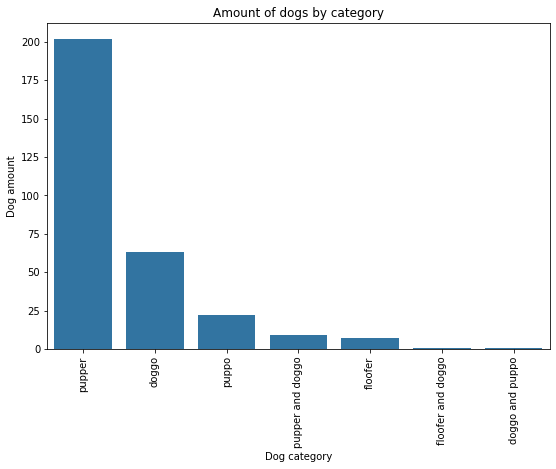

In [715]:
df_enh_api_img2 = df_enh_api_img1.query("category!='None'")
counts = df_enh_api_img2['category'].value_counts()
order=counts.index
color = sb.color_palette()[0]
plt.figure(figsize=(9,6))
sb.countplot(data=df_enh_api_img2, x='category', color=color, order=order)
plt.xticks(rotation=90)
plt.ylabel('Dog amount')
plt.xlabel('Dog category')
plt.title('Amount of dogs by category');

In [716]:
#### Scatter plot for two quantitative variables and a qualitative one.

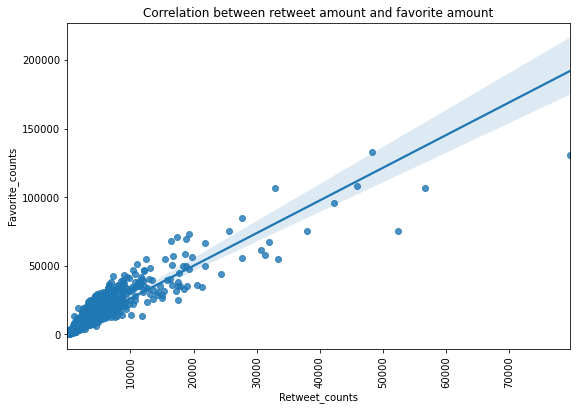

In [717]:
plt.figure(figsize=(9,6))
sb.regplot(data=df_enh_api_img1, x='retweet_count', y='favorite_count')
plt.xlabel('Retweet_counts')
plt.ylabel('Favorite_counts')
plt.xticks(rotation=90)
plt.title('Correlation between retweet amount and favorite amount');

In [718]:
df_enh_api_img1['year'] = df_enh_api_img1['timestamp'].map(lambda x: x.year)

In [719]:
df_enh_api_img1['year'] = df_enh_api_img1['year'].astype(str)
df_enh_api_img1['year'] = pd.Categorical(df_enh_api_img1['year'], categories=sorted(df_enh_api_img1['year'].unique()),ordered=True)

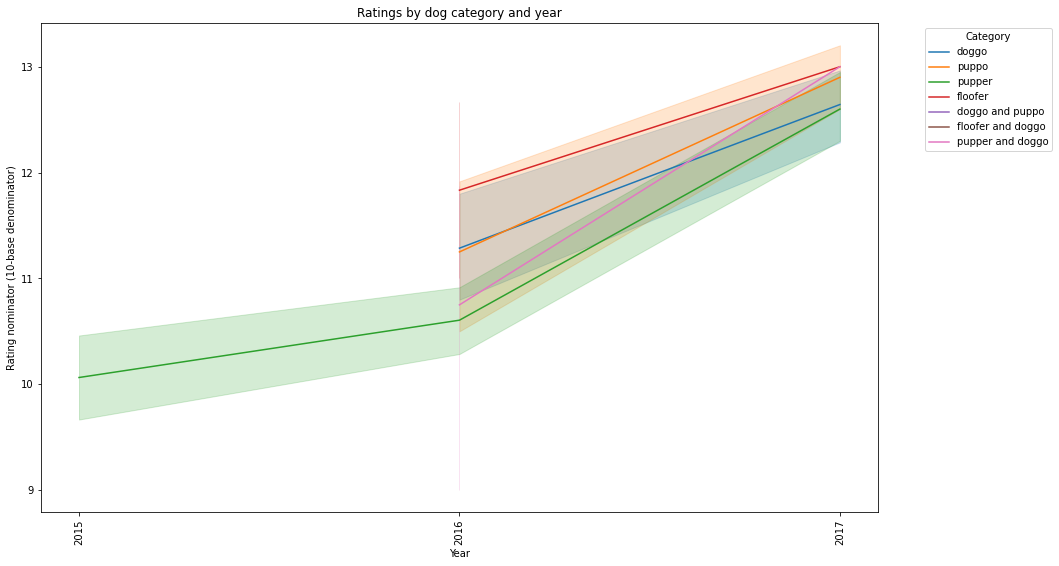

In [720]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')
plt.figure(figsize=(15,9))
ax=sb.lineplot(x="year", y='new_numerator', hue="category", markers=True, data=df_enh_api_img1.query("category!='None'"))
plt.xlabel('Year')
plt.ylabel('Rating nominator (10-base denominator)')
plt.title('Ratings by dog category and year')
plt.xticks(rotation=90)
ax.legend(title = 'Category', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show();


In [721]:
pred1=df_enh_api_img1[df_enh_api_img1['prediction1_dog']==True]
mean1=pred1.pred1_confidence.mean()
mean1

0.6141826382892059

In [722]:
p1=pred1.groupby('prediction1').pred1_confidence.mean()

In [723]:
df_ord1 = p1.sort_values(ascending=False).head(10)
df_ord1 = pd.DataFrame(df_ord1).reset_index()
df_ord1

,prediction1,pred1_confidence
0,komondor,0.972531
1,brittany_spaniel,0.874545
2,keeshond,0.844431
3,bull_mastiff,0.815618
4,bernese_mountain_dog,0.801816
5,french_bulldog,0.770627
6,pug,0.759223
7,pomeranian,0.751073
8,samoyed,0.747088
9,german_short_haired_pointer,0.732425


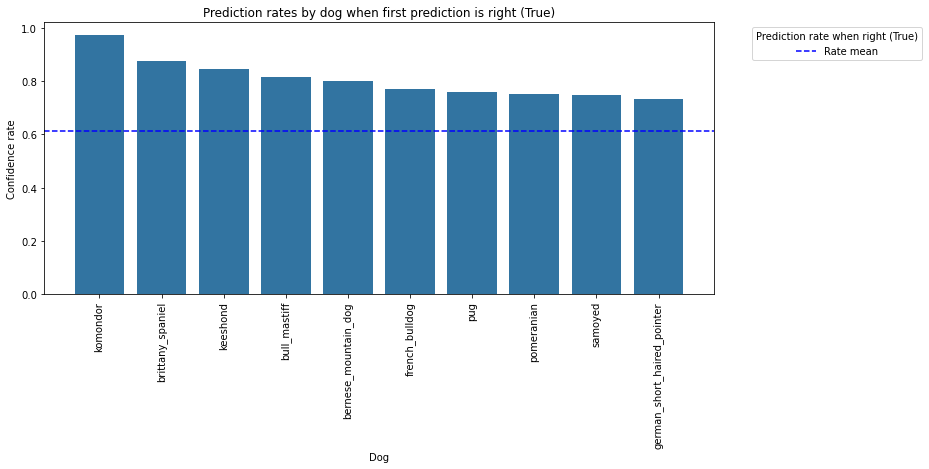

In [724]:
plt.figure(figsize=(12,5))
ax = sb.barplot(data = df_ord1, x = 'prediction1', y = 'pred1_confidence', color=color)
plt.xticks(rotation=90)
plt.xlabel('Dog')
plt.ylabel('Confidence rate')
plt.axhline(y = mean1, color = 'b', linestyle = '--') 
mean_line3= ax.plot(mean1, label='Rate mean', linestyle='--', color='b')
plt.title('Prediction rates by dog when first prediction is right (True)')
ax.legend(title = 'Prediction rate when right (True)', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

Above we can see which ten dogs have higher prediction rates and how is the comparison with the overall average prediction value when the prediction is right for the first prediction.

In [725]:
pred2=df_enh_api_img1[df_enh_api_img1['prediction2_dog']==True]
mean2=pred2.pred2_confidence.mean()
mean2

0.14017722328626028

In [726]:
p2=pred2.groupby('prediction2').pred2_confidence.mean()

In [727]:
df_ord2 = p2.sort_values(ascending=False).head(10)
df_ord2 = pd.DataFrame(df_ord2).reset_index()
df_ord2

,prediction2,pred2_confidence
0,bernese_mountain_dog,0.415374
1,standard_schnauzer,0.285276
2,cairn,0.265784
3,kerry_blue_terrier,0.250014
4,siberian_husky,0.218450
5,malamute,0.203253
6,flat_coated_retriever,0.202674
7,english_foxhound,0.202591
8,affenpinscher,0.199619
9,eskimo_dog,0.199214


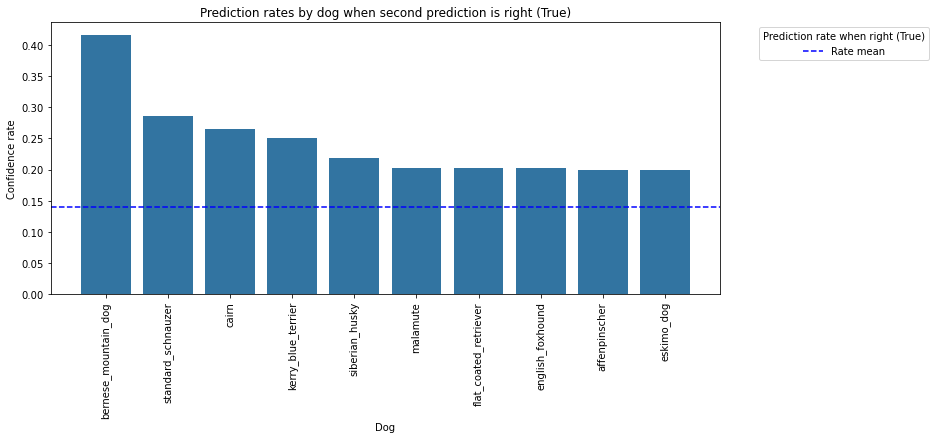

In [728]:
plt.figure(figsize=(12,5))
ax = sb.barplot(data = df_ord2, x = 'prediction2', y = 'pred2_confidence', color=color)
plt.xticks(rotation=90)
plt.xlabel('Dog')
plt.ylabel('Confidence rate')
plt.axhline(y = mean2, color = 'b', linestyle = '--') 
mean_line3= ax.plot(mean2, label='Rate mean', linestyle='--', color='b')
plt.title('Prediction rates by dog when second prediction is right (True)')
ax.legend(title = 'Prediction rate when right (True)', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

Above we can see which ten dogs have higher prediction rates and how is the comparison with the overall average prediction value when the prediction is right for the second prediction.

In [729]:
pred3=df_enh_api_img1[df_enh_api_img1['prediction3_dog']==True]
mean3=pred3.pred3_confidence.mean()
mean3

0.0613055763623648

In [730]:
p3=pred3.groupby('prediction3').pred3_confidence.mean()

In [731]:
df_ord3 = p3.sort_values(ascending=False).head(10)
df_ord3 = pd.DataFrame(df_ord3).reset_index()
df_ord3

,prediction3,pred3_confidence
0,briard,0.193001
1,sealyham_terrier,0.114437
2,english_foxhound,0.100051
3,flat_coated_retriever,0.097543
4,standard_schnauzer,0.095434
5,giant_schnauzer,0.091619
6,collie,0.091340
7,shih_tzu,0.088209
8,eskimo_dog,0.086965
9,german_short_haired_pointer,0.086864


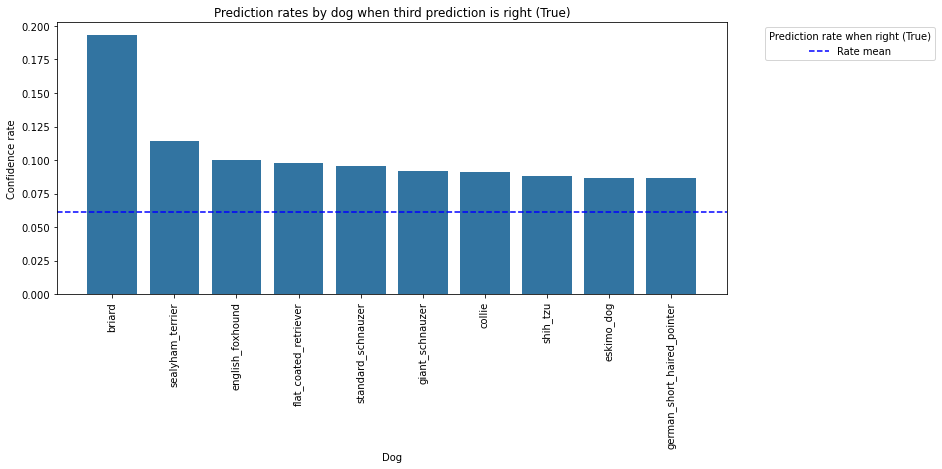

In [732]:
plt.figure(figsize=(12,5))
ax = sb.barplot(data = df_ord3, x = 'prediction3', y = 'pred3_confidence', color=color)
plt.xticks(rotation=90)
plt.xlabel('Dog')
plt.ylabel('Confidence rate')
plt.axhline(y = mean3, color = 'b', linestyle = '--') 
mean_line3= ax.plot(mean3, label='Rate mean', linestyle='--', color='b')
plt.title('Prediction rates by dog when third prediction is right (True)')
ax.legend(title = 'Prediction rate when right (True)', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

Above we can see which ten dogs have higher prediction rates and how is the comparison with the overall average prediction value when the prediction is right for the third prediction.

In [733]:
df_enh_api_img1.to_csv('twitter_archive_master_csv', index=False) # Convert the cleaned and wrangle dataframe into a '.csv'